In [8]:
data <- read.csv("../data/projects/cP.p", header = FALSE, sep = ";", comment.char="", quote="", fill = TRUE)
 #               colClasses=c("character", "numeric", "numeric","numeric","numeric","numeric","numeric"),
 #               na.strings='NULL')
names(data) <- c("p","nmc","nblob","ncore","ncmt","na","ncopy")
data$copied <- data$ncopy > 0

In [9]:
summary(data)

                                        p               nmc         
                                         :   744   Min.   :  0.000  
 0-0Yang_canteen                         :     1   1st Qu.:  1.000  
 0-1123_mvp1001nights2                   :     1   Median :  1.000  
 0-1CxH_Hadoop-MapReduce-Spark-Excercises:     1   Mean   :  6.392  
 0-Eclipse-0_Tic-Tac-Toe                 :     1   3rd Qu.:  3.000  
 0-Inacio-0_Prova-Lab-V                  :     1   Max.   :500.000  
 (Other)                                 :734909   NA's   :744      
     nblob            ncore             ncmt                na        
 1      : 44649   1      :462941   Min.   :       1   1      :377286  
 2      : 36855   2      :157530   1st Qu.:       2   2      :164745  
 3      : 24998   3      : 39016   Median :       7   3      : 48720  
 4      : 20647   4      : 16945   Mean   :     676   4      : 25320  
 5      : 16541   5      :  9108   3rd Qu.:      32   5      : 15977  
 6      : 14698   6   

In [10]:
head(data)

,p,nmc,nblob,ncore,ncmt,na,ncopy,copied
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<lgl>
1,0-0Yang_canteen,3,408,1,54,3,58,TRUE
2,0-1CxH_Hadoop-MapReduce-Spark-Excercises,2,253,1,20,1,2,TRUE
3,0-Eclipse-0_Tic-Tac-Toe,2,21,2,6,2,93,TRUE
4,0-Inacio-0_Prova-Lab-V,1,112,1,3,1,3,TRUE
5,0-complexity_selfhealing,23,1276,9,858,30,103,TRUE
6,0-ho98_Todoly,3,138,2,73,4,4,TRUE


In [13]:
data$lnmc <- log(as.numeric(data$nmc) + 1)
data$lnblob <- log(as.numeric(data$nblob) + 1)
data$lncore <- log(as.numeric(data$ncore) + 1)
data$lncmt <- log(as.numeric(data$ncmt) + 1)
data$lna <- log(as.numeric(data$na) + 1)
data$lncopy <- log(as.numeric(data$ncopy) + 1)
nas <- which(is.na(data$nmc) | is.na(data$ncmt))
data_c <- data[-nas,c("p","lnmc","lnblob","lncore","lncmt","lna","lncopy","copied")]

In [14]:
summary(data_c)

                                        p               lnmc       
 0-0Yang_canteen                         :     1   Min.   :0.0000  
 0-1123_mvp1001nights2                   :     1   1st Qu.:0.6931  
 0-1CxH_Hadoop-MapReduce-Spark-Excercises:     1   Median :0.6931  
 0-Eclipse-0_Tic-Tac-Toe                 :     1   Mean   :1.2557  
 0-Inacio-0_Prova-Lab-V                  :     1   3rd Qu.:1.3863  
 0-complexity_selfhealing                :     1   Max.   :6.2166  
 (Other)                                 :734908                   
     lnblob           lncore           lncmt              lna        
 Min.   : 1.099   Min.   :0.6931   Min.   : 0.6931   Min.   :0.6931  
 1st Qu.: 8.595   1st Qu.:1.0986   1st Qu.: 1.0986   1st Qu.:1.0986  
 Median : 9.378   Median :1.0986   Median : 2.0794   Median :1.0986  
 Mean   : 8.553   Mean   :2.8291   Mean   : 2.6193   Mean   :3.8062  
 3rd Qu.: 9.759   3rd Qu.:5.5872   3rd Qu.: 3.4965   3rd Qu.:6.5162  
 Max.   :10.102   Max.   :6.9698   M

In [24]:
pred_n <- c(2:6)
cor(data_c[,pred_n],method="spearman")

,lnmc,lnblob,lncore,lncmt,lna
lnmc,1.0000000,0.10329556,0.43729725,0.7700929,0.5316708
lnblob,0.1032956,1.00000000,0.09036291,0.1733729,0.1093828
lncore,0.4372973,0.09036291,1.00000000,0.5017078,0.7642414
lncmt,0.7700929,0.17337286,0.50170784,1.0000000,0.6327536
lna,0.5316708,0.10938276,0.76424144,0.6327536,1.0000000


Standard deviations (1, .., p=5):
[1] 1.6844295 0.9636977 0.9255659 0.4875632 0.3736227

Rotation (n x k) = (5 x 5):
              PC1         PC2        PC3         PC4         PC5
lnmc   -0.4807526  0.20889961 -0.5280206 -0.16093201  0.64848513
lnblob -0.2002853 -0.96991589 -0.1156668 -0.04969607  0.05744964
lncore -0.4690351  0.06078592  0.5519701 -0.68123727 -0.08692453
lncmt  -0.5183997  0.10744010 -0.4173048  0.12135472 -0.72859325
lna    -0.4899291  0.01964198  0.4785406  0.70201140  0.19432596


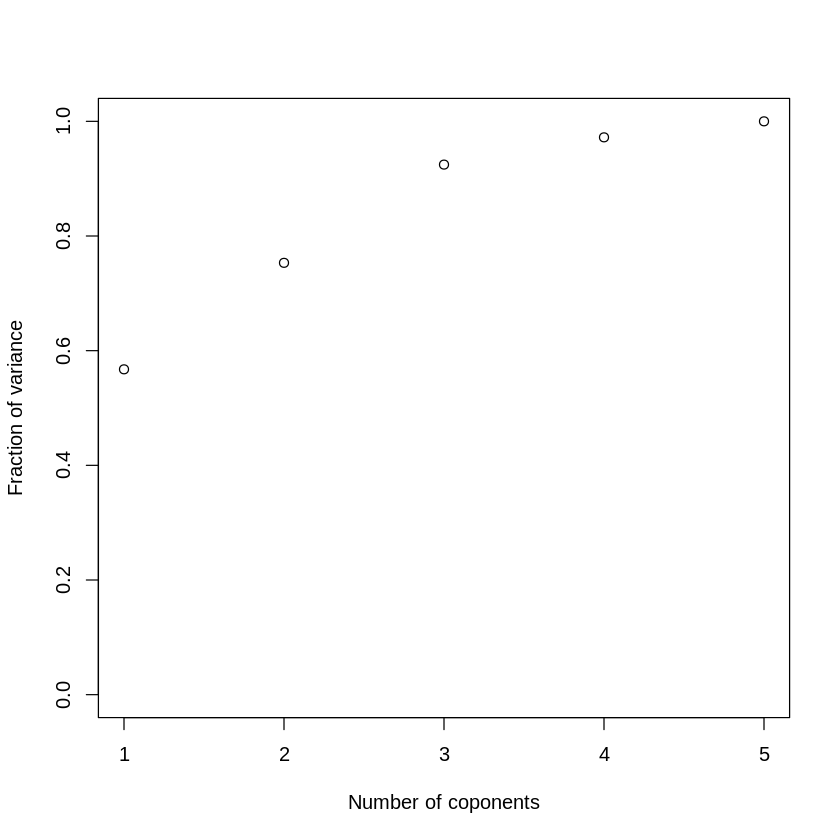

In [27]:
pca <- prcomp(data_c[,pred_n], retx=F, scale=T)
print(pca)
var <- sum(pca$sdev^2)
cumVar <- cumsum(pca$sdev^2)
plot(1:5,cumVar/var,ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance")

In [28]:
n <- 0
varPer <- 0.9
for (i in c(1:length(pca$sdev))) {
    if(cumVar[i] > var*varPer) {
        n <- i
        break
    }
}
res <- pca$rotation[,1:n]
resAbs <- res
resAbs[res<0] <- -res[res<0]
for (i in 1:n)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

          lnmc     lncore      lncmt        lna
PC1 -0.4807526 -0.4690351 -0.5183997 -0.4899291
        lnblob
PC2 -0.9699159
          lnmc    lncore      lncmt       lna
PC3 -0.5280206 0.5519701 -0.4173048 0.4785406


In [29]:
vnam <- names(data_c[,pred_n])
len <- dim(data_c[,pred_n])[2]
res <- vector(mode="list", length=len)
for (i in 1:len){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-i],collapse="+"),sep="~"));
  res[[i]] <- lm(fmla,data=data_c[,pred_n]);
}
for (i in 1:len) {
    print(c(vnam[i],"-> ",summary(res[[i]])$adj.r.squared),quote=FALSE)
}

[1] lnmc              ->                0.720308953765154
[1] lnblob             ->                 0.0712606765522401
[1] lncore            ->                0.590754660045161
[1] lncmt             ->                0.760487942234244
[1] lna               ->                0.629074745993651


In [30]:
lm <- lm(lncopy~lnmc+lncore+lncmt+lna+lnblob, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lncore + lncmt + lna + lnblob, data = data_c)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1102  -0.7152  -0.1488   0.3412  13.6214 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.9069092  0.0070780 -128.13   <2e-16 ***
lnmc         0.8956133  0.0036799  243.38   <2e-16 ***
lncore       0.0641405  0.0012092   53.04   <2e-16 ***
lncmt        0.3990020  0.0019573  203.86   <2e-16 ***
lna         -0.0625279  0.0010294  -60.74   <2e-16 ***
lnblob      -0.0005864  0.0008037   -0.73    0.466    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.521 on 734908 degrees of freedom
Multiple R-squared:  0.4852,	Adjusted R-squared:  0.4852 
F-statistic: 1.385e+05 on 5 and 734908 DF,  p-value: < 2.2e-16


In [15]:
lm <- lm(lncopy~lnmc+lnblob+lncmt, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lncmt, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9587 -0.7299 -0.1139  0.3322 13.4033 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.9096742  0.0070580 -128.886  < 2e-16 ***
lnmc         0.9127463  0.0036796  248.056  < 2e-16 ***
lnblob      -0.0031440  0.0008024   -3.918 8.92e-05 ***
lncmt        0.3786123  0.0018423  205.510  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 734910 degrees of freedom
Multiple R-squared:  0.4824,	Adjusted R-squared:  0.4824 
F-statistic: 2.283e+05 on 3 and 734910 DF,  p-value: < 2.2e-16


In [16]:
glm <- glm(copied~lnmc+lnblob+lncmt,data=data_c,family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lnblob + lncmt, family = binomial, 
    data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0869  -0.8110  -0.6077   0.9117   2.2291  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.175628   0.014805 -214.50   <2e-16 ***
lnmc         0.430754   0.006185   69.64   <2e-16 ***
lnblob       0.098942   0.001597   61.94   <2e-16 ***
lncmt        0.535239   0.002934  182.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 990582  on 734913  degrees of freedom
Residual deviance: 785021  on 734910  degrees of freedom
AIC: 785029

Number of Fisher Scoring iterations: 5


In [31]:
lm <- lm(lncopy~lnmc+lncmt, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lncmt, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9463 -0.7297 -0.1135  0.3310 13.3976 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.934442   0.003140  -297.6   <2e-16 ***
lnmc         0.914186   0.003661   249.7   <2e-16 ***
lncmt        0.377111   0.001802   209.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 734911 degrees of freedom
Multiple R-squared:  0.4824,	Adjusted R-squared:  0.4824 
F-statistic: 3.425e+05 on 2 and 734911 DF,  p-value: < 2.2e-16


In [32]:
glm <- glm(copied~lnmc+lncmt,data=data_c,family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lncmt, family = binomial, data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1709  -0.7996  -0.5821   0.9082   1.9282  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.367949   0.006020 -393.35   <2e-16 ***
lnmc         0.409360   0.006197   66.06   <2e-16 ***
lncmt        0.569298   0.002898  196.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 990582  on 734913  degrees of freedom
Residual deviance: 789365  on 734911  degrees of freedom
AIC: 789371

Number of Fisher Scoring iterations: 5
